<a href="https://colab.research.google.com/github/SaraPMC/fiap-deep-learning/blob/main/TrabalhoFinal/Exercicio1/TrabalhoFinal_RedesNeuraisMulticamadas_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Redes Neurais Multicamadas**

**Exercício #1**

Utilizando as bibliotecas do Keras e TensorFlow faça:

• Utilizando do dataset Iris (embarcado no scikit-learn, from sklearn
import datasets - datasets.load_iris() ), configure uma Rede Neural MLP
para classificar as amostras de plantas nas 3 classes presentes no
dataset.

• Utilizando o dataset Heart Disease UCI (disponível no repositório da
disciplina e em https://www.kaggle.com/ronitf/heart-disease-uci)
configure uma Rede Neural MLP que classifique as amostras em
saudáveis (coluna target =0) ou não.

• Utilizando o dataset Pulsar Star (disponível no repositório da disciplina e
em https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star/)
construa uma Rede Neural MLP que classifique as amostras em
estrelas de nêutrons ou não.

**Obs.:** os links para os datasets acima está dando 404 not found! Encontramos outros no site https://www.kaggle.com

* Heart Disease UCI: https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci


* Pulsar Star: https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate

# Classificação das amostras de plantas do dataset Iris

In [1]:
#importando as bibliotecas
from sklearn import datasets
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
#Importando o dataset iris
iris = datasets.load_iris()

In [3]:
#Separando os dados em X e y, os valores das caracteristicas independentes e dependentes
X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#Separando entre treino e teste, onde 30% do conjunto é reservado para verificar a precisão do modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
sc_X = StandardScaler()
X_trainscaled = sc_X.fit_transform(X_train)
X_testscaled = sc_X.transform(X_test)

In [6]:
#Modelagem de 4 camadas ocultas com neuronios diferentes.
#Totalizando 6 camadas considerando as de entrada/saida
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32), activation="relu", random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

0.9555555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


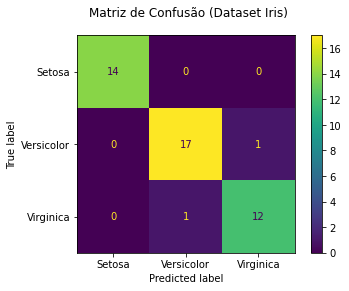

In [7]:
#Desenhando uma matriz de confusão para entender a classificação
fig=plot_confusion_matrix(clf, X_testscaled, y_test,display_labels=["Setosa", "Versicolor", "Virginica"])
fig.figure_.suptitle("Matriz de Confusão (Dataset Iris)")
plt.show()

# Classificação das amostras em "saudáveis ou não" do dataset Heart Disease UCI

In [11]:
#importando as bibliotecas
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [12]:
#Importando o dataset
heart = pd.read_csv('/content/HeartDiseaseTrain-Test.csv')
heart.head()

#target: Heart disease (0 = no, 1 = yes) / doença no coração

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [13]:
#Tratamento dos dados

In [14]:
print("Unique sex: ")
print(heart["sex"].unique())
heart["sex"] = np.where(heart['sex'] == 'Female', 1, 0)

Unique sex: 
['Male' 'Female']


In [15]:
print("Unique chest_pain_type: ")
print(heart["chest_pain_type"].unique())
heart['chest_pain_type'] = np.where(heart['chest_pain_type'] == 'Non-anginal pain', 0,
                           np.where(heart['chest_pain_type'] == 'Asymptomatic', 1,
                           np.where(heart['chest_pain_type'] == 'Typical angina', 2, 3)))

Unique chest_pain_type: 
['Typical angina' 'Atypical angina' 'Non-anginal pain' 'Asymptomatic']


In [16]:
print("Unique fasting_blood_sugar: ")
print(heart["fasting_blood_sugar"].unique())
heart["fasting_blood_sugar"] = np.where(heart['fasting_blood_sugar'] == 'Greater than 120 mg/ml', 1, 0)

Unique fasting_blood_sugar: 
['Lower than 120 mg/ml' 'Greater than 120 mg/ml']


In [17]:
print("Unique rest_ecg: ")
print(heart["rest_ecg"].unique())
heart['rest_ecg'] = np.where(heart['rest_ecg'] == 'ST-T wave abnormality', -1,
                    np.where(heart['rest_ecg'] == 'Normal', 0, 1))

Unique rest_ecg: 
['ST-T wave abnormality' 'Normal' 'Left ventricular hypertrophy']


In [18]:
print("Unique exercise_induced_angina: ")
print(heart["exercise_induced_angina"].unique())
heart["exercise_induced_angina"] = np.where(heart['exercise_induced_angina'], 1, 0)

Unique exercise_induced_angina: 
['No' 'Yes']


In [19]:
print("Unique slope: ")
print(heart["slope"].unique())
heart['slope'] = np.where(heart['slope'] == 'Downsloping', -1,
                 np.where(heart['slope'] == 'Flat', 0, 1))

Unique slope: 
['Downsloping' 'Upsloping' 'Flat']


In [20]:
print("Unique vessels_colored_by_flourosopy: ")
print(heart["vessels_colored_by_flourosopy"].unique())
heart['vessels_colored_by_flourosopy'] = np.where(heart['vessels_colored_by_flourosopy'] == 'Zero', 0,
                                         np.where(heart['vessels_colored_by_flourosopy'] == 'One', 1,
                                         np.where(heart['vessels_colored_by_flourosopy'] == 'Two', 2,
                                         np.where(heart['vessels_colored_by_flourosopy'] == 'Three', 3, 4))))

Unique vessels_colored_by_flourosopy: 
['Two' 'Zero' 'One' 'Three' 'Four']


In [21]:
print("Unique thalassemia: ")
print(heart["thalassemia"].unique())
heart['thalassemia'] = np.where(heart['thalassemia'] == 'No', 0,
                       np.where(heart['thalassemia'] == 'Normal', 1,
                       np.where(heart['thalassemia'] == 'Reversable Defect', 2, 3)))

Unique thalassemia: 
['Reversable Defect' 'Fixed Defect' 'Normal' 'No']


In [22]:
heart.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,0,2,125,212,0,-1,168,1,1.0,-1,2,2,0
1,53,0,2,140,203,1,0,155,1,3.1,1,0,2,0
2,70,0,2,145,174,0,-1,125,1,2.6,1,0,2,0
3,61,0,2,148,203,0,-1,161,1,0.0,-1,1,2,0
4,62,1,2,138,294,1,-1,106,1,1.9,0,3,3,0


In [23]:
#Separando entre treino e teste, onde 30% do conjunto é reservado para verificar a precisão do modelo
X = heart.iloc[:,:-1].values
y = heart.iloc[:,-1].values

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
#Modelagem com 2 camadas ocultas com neuronios diferentes.
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=100, activation = "relu"))
ann.add(tf.keras.layers.Dense(units = 100, activation = "relu"))
ann.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))
ann.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [25]:
#Nós treinamos a rede neural com 150 épocas com tamanho de lote de 32 para o procedimento de retropropagação.
ann.fit(X_train,y_train,batch_size = 32, epochs = 150 )

Epoch 1/150
23/23 [==============================] - 1s 2ms/step - loss: 0.5751 - accuracy: 0.7211
Epoch 2/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8340
Epoch 3/150
23/23 [==============================] - 0s 3ms/step - loss: 0.3723 - accuracy: 0.8577
Epoch 4/150
23/23 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8591
Epoch 5/150
23/23 [==============================] - 0s 3ms/step - loss: 0.3267 - accuracy: 0.8675
Epoch 6/150
23/23 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8773
Epoch 7/150
23/23 [==============================] - 0s 2ms/step - loss: 0.2861 - accuracy: 0.8870
Epoch 8/150
23/23 [==============================] - 0s 3ms/step - loss: 0.2709 - accuracy: 0.8828
Epoch 9/150
23/23 [==============================] - 0s 2ms/step - loss: 0.2527 - accuracy: 0.8870
Epoch 10/150
23/23 [==============================] - 0s 3ms/step - loss: 0.2400 - accuracy: 0.8982
Epoch 11/

In [26]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

10/10 [==============================] - 0s 2ms/step


In [29]:
#Matriz de Confusão e Acurácia
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[154   0]
 [  0 154]]


1.0

# Classificação das amostras em "estrelas de nêutrons ou não" do dataset Pulse Star

In [74]:
#importando as bibliotecas
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, IsolationForest, StackingClassifier, VotingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

!pip install xgboost
from xgboost import XGBClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
#Importando o dataset
pulsar = pd.read_csv('pulsar_data_train.csv')
pulsar.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
8,95.007812,40.219805,0.347578,1.153164,2.770067,18.217741,7.851205,70.801938,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,NaN,5.702532,36.342493,0.0


In [33]:
pulsar.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,10102.000000,10102.000000,8714.000000,10102.000000,10101.000000,9152.000000,10101.000000,9596.000000,10101.000000
mean,111.074054,46.512113,0.474386,1.786861,12.698314,26.381768,8.331023,105.225910,0.092565
std,25.750521,6.757943,1.061620,6.228198,29.732656,19.639895,4.511829,105.988179,0.289836
min,5.812500,24.772042,-1.738021,-1.755332,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,101.017578,42.384688,0.021766,-0.192124,1.907191,14.415562,5.826356,35.662090,0.000000
50%,115.265625,46.936599,0.219963,0.200610,2.786789,18.405448,8.460500,83.350425,0.000000
75%,127.246094,50.990439,0.464708,0.927771,5.377090,28.334311,10.731702,139.923671,0.000000
max,189.734375,91.206475,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [39]:
pulsar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10102 entries, 0 to 10101
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                10102 non-null  float64
 1    Standard deviation of the integrated profile  10102 non-null  float64
 2    Excess kurtosis of the integrated profile     8714 non-null   float64
 3    Skewness of the integrated profile            10102 non-null  float64
 4    Mean of the DM-SNR curve                      10101 non-null  float64
 5    Standard deviation of the DM-SNR curve        9152 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           10101 non-null  float64
 7    Skewness of the DM-SNR curve                  9596 non-null   float64
 8   target_class                                   10101 non-null  float64
dtypes: float64(9)
memory usage: 710.4 KB


In [40]:
#Quantidade de dados nulos
pulsar.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1388
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           1
 Standard deviation of the DM-SNR curve           950
 Excess kurtosis of the DM-SNR curve                1
 Skewness of the DM-SNR curve                     506
target_class                                        1
dtype: int64

In [46]:
#Porcentagem de dados nulos
pulsar.isnull().sum() / pulsar.count() * 100

 Mean of the integrated profile                   0.000000
 Standard deviation of the integrated profile     0.000000
 Excess kurtosis of the integrated profile       15.928391
 Skewness of the integrated profile               0.000000
 Mean of the DM-SNR curve                         0.009900
 Standard deviation of the DM-SNR curve          10.380245
 Excess kurtosis of the DM-SNR curve              0.009900
 Skewness of the DM-SNR curve                     5.273030
target_class                                      0.009900
dtype: float64

In [64]:
#Dropa os NaN's
pulsar = pulsar.dropna()

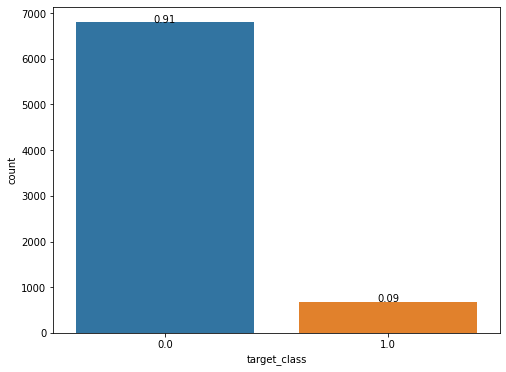

In [65]:
#Visualizando a distribuição da classe "Target"
plt.figure(figsize = (8, 6))
total = float(len(pulsar))
ax = sns.countplot(x = 'target_class', data = pulsar)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center") 

In [66]:
# Separa todas as colunas menos a target
colunas = list(set(pulsar.columns) - set(['target_class']))
colunas.sort()
colunas

[' Excess kurtosis of the DM-SNR curve',
 ' Excess kurtosis of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Mean of the integrated profile',
 ' Skewness of the DM-SNR curve',
 ' Skewness of the integrated profile',
 ' Standard deviation of the DM-SNR curve',
 ' Standard deviation of the integrated profile']

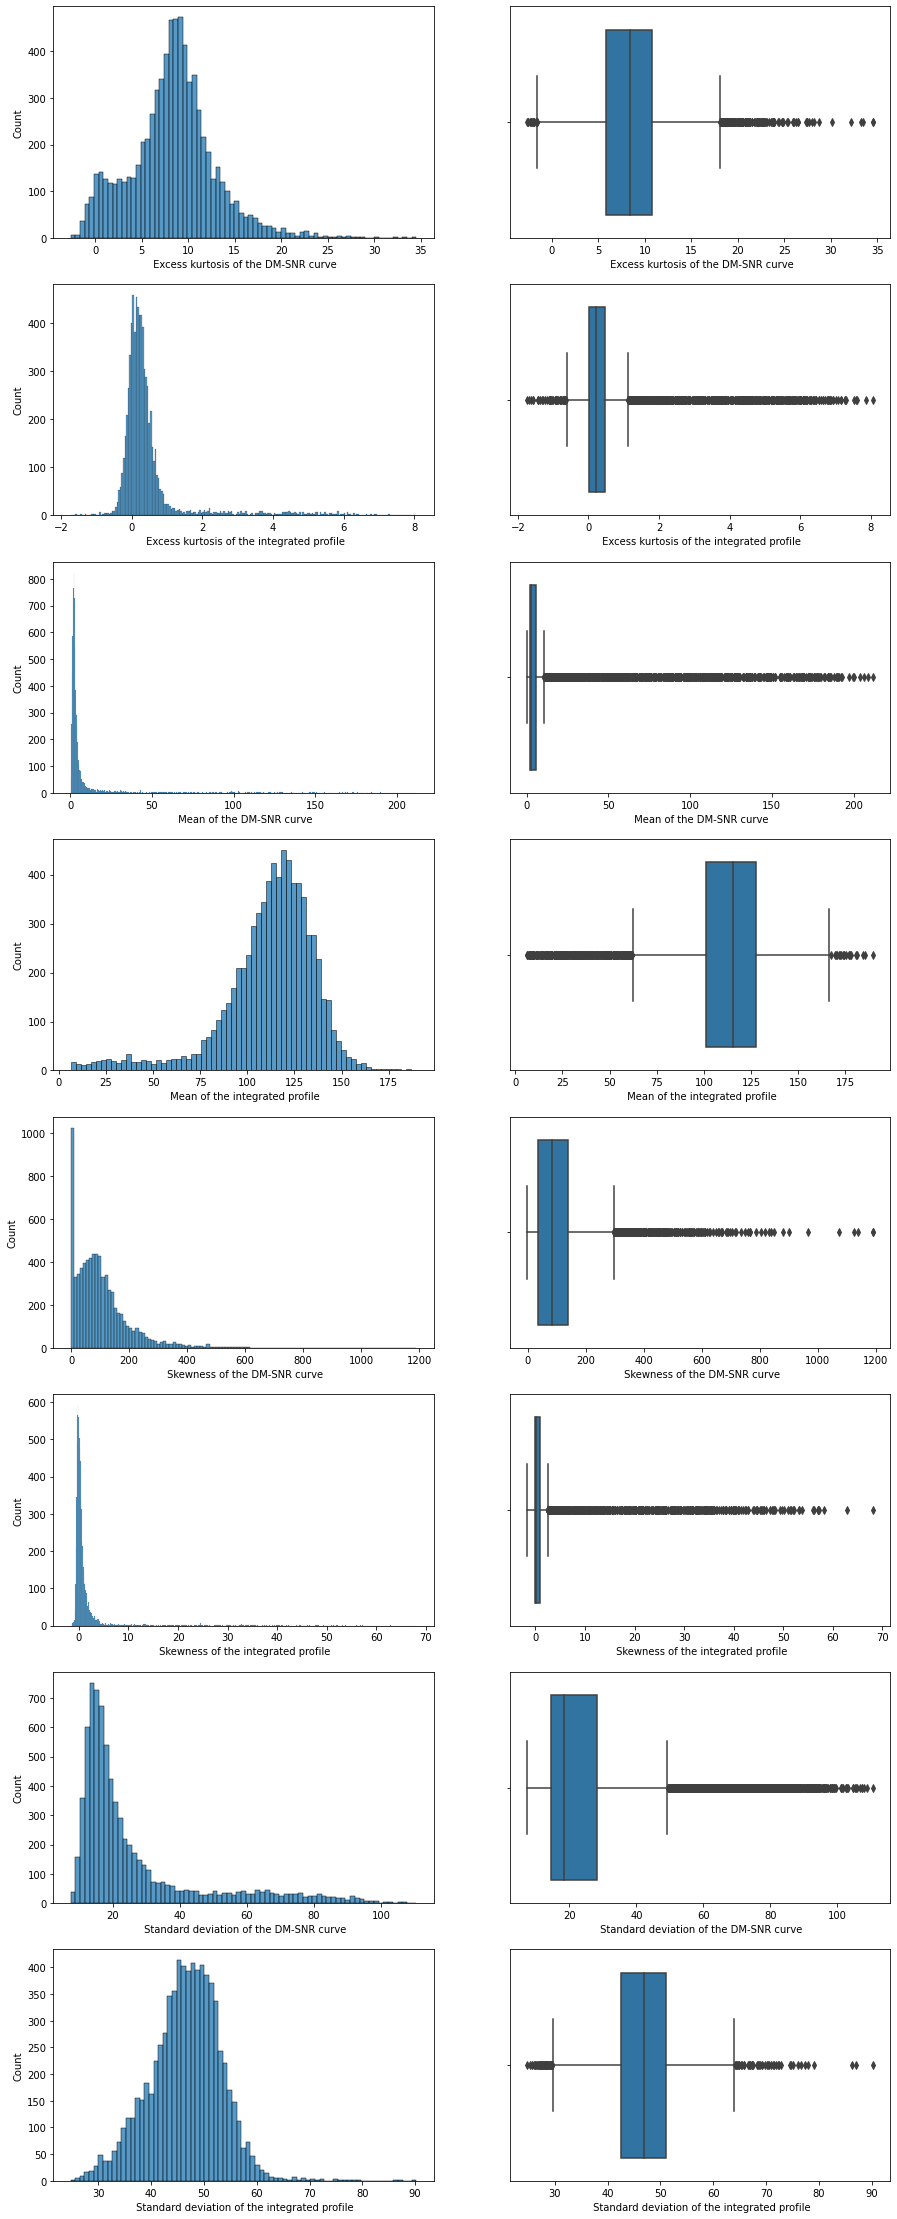

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

In [67]:
#Histogramas
fig, axes = plt.subplots(nrows = len(colunas), ncols=2,  figsize=(15, 40))
for i in range(len(colunas)):
    feature = colunas[i]
    plt.figure(figsize = (5, 3))
    data = pulsar.copy()
    sns.histplot(x=data[feature].dropna(), ax=axes[i][0])
    sns.boxplot(x=data[feature].dropna(), ax=axes[i][1])

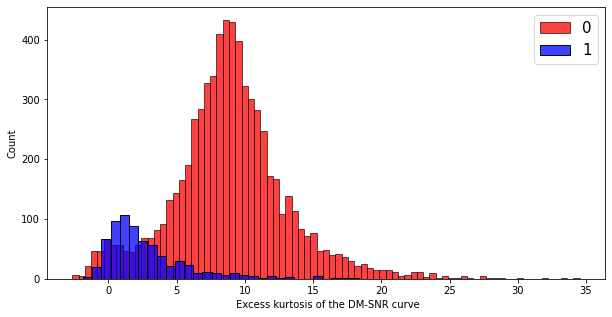

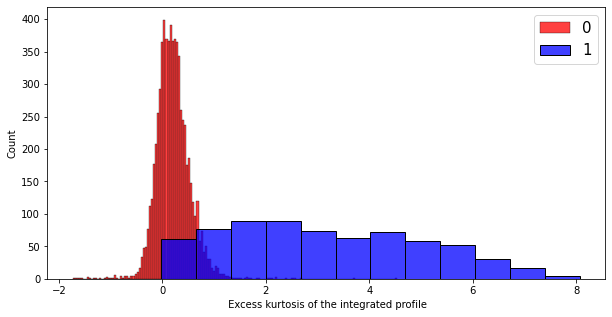

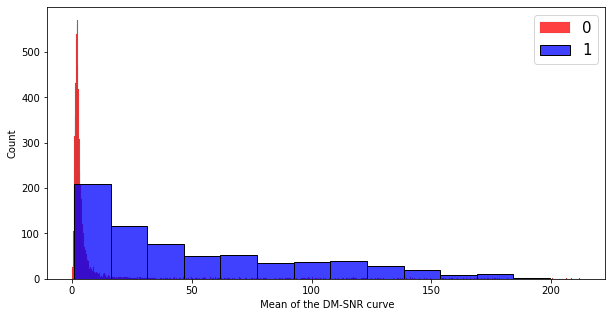

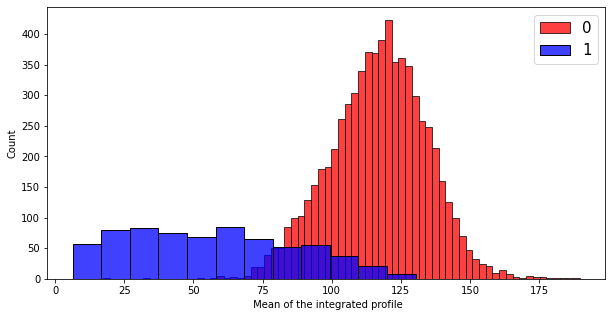

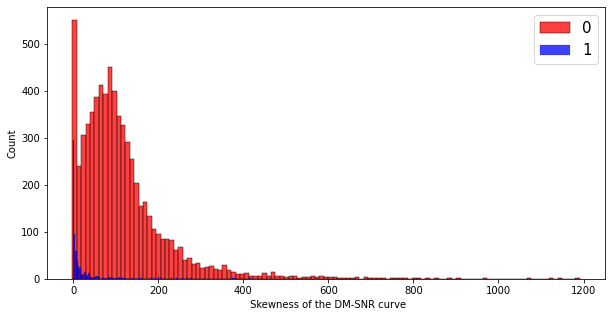

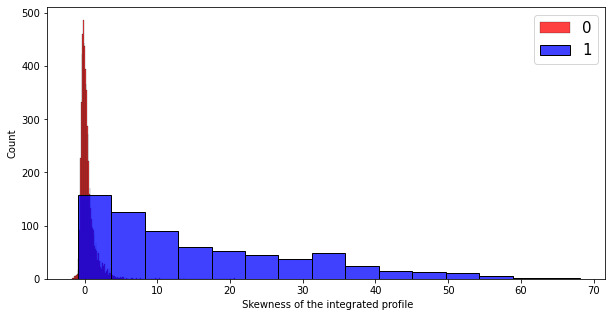

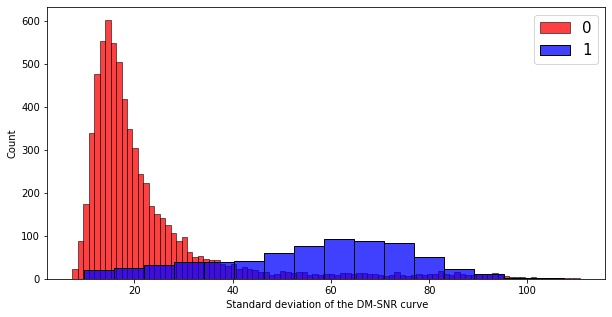

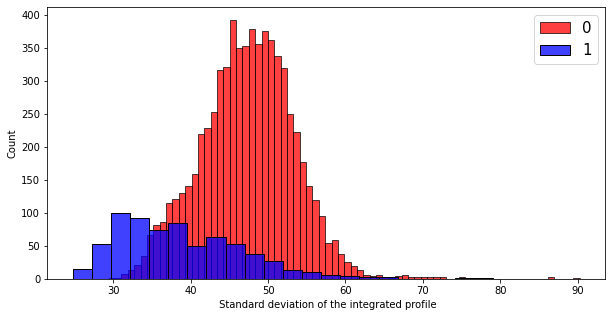

In [68]:
#Histograma da Coluna target com as demais colunas
train_dummy = pulsar.copy()
for feature in colunas:
  fig, axs = plt.subplots(figsize=(10, 5))
  sns.histplot(train_dummy[train_dummy['target_class']==0][feature].dropna(), color='red')
  sns.histplot(train_dummy[train_dummy['target_class']==1][feature].dropna(), color='blue')

  plt.legend([0, 1], loc='upper right', prop={'size': 15})
  plt.show()

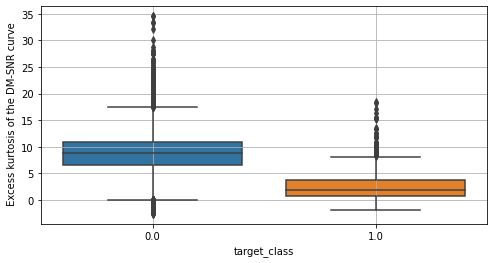

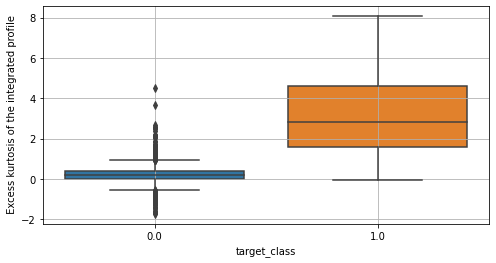

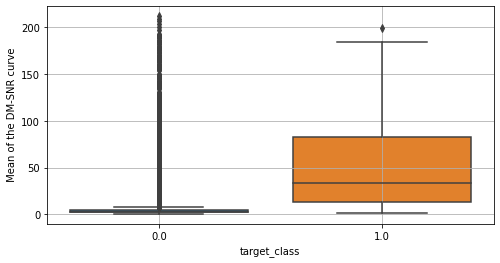

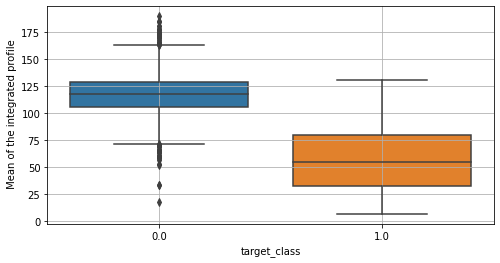

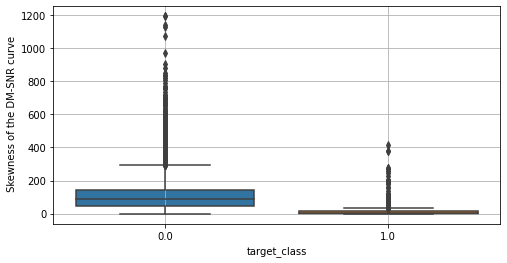

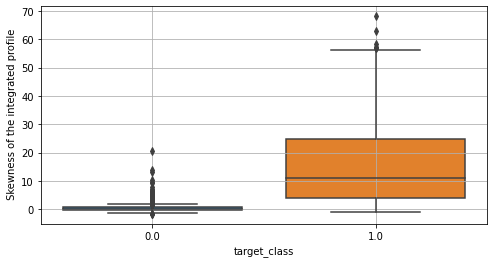

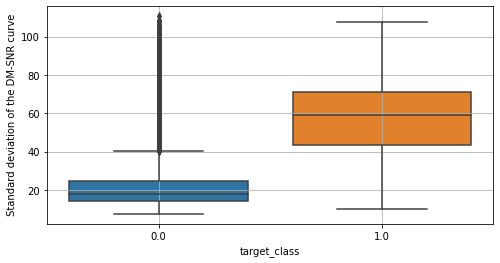

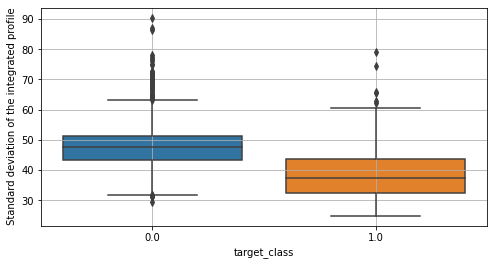

In [69]:
#Outliers
for i in range(len(colunas)):
  feature = colunas[i]
  plt.figure(figsize = (8, 4))
  sns.boxplot(x = 'target_class', y = colunas[i], data = pulsar)
  plt.grid()
  plt.show()

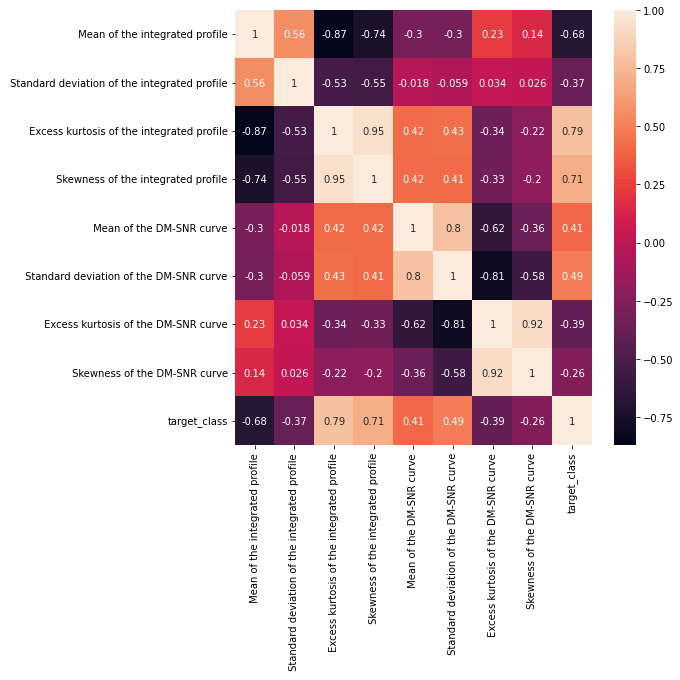

In [70]:
#Correlação
plt.figure(figsize = (8, 8))
corr_mat = pulsar.corr()
sns.heatmap(corr_mat, xticklabels = corr_mat.columns, yticklabels = corr_mat.columns, annot=True)

In [71]:
y = pulsar['target_class']
x = pulsar.copy().drop(['target_class'], axis = 1)

In [72]:
#Separado em teste e treino
x_train, x_test1, y_train, y_test1 = train_test_split(x, y, test_size=0.40, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.50, random_state=42)

In [73]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(4491, 8)
(1497, 8)
(1497, 8)
(4491,)
(1497,)
(1497,)


In [75]:
#treinamento do modelo
#Regressão logistica
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9732798931195725
[[1342   10]
 [  30  115]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1352
         1.0       0.92      0.79      0.85       145

    accuracy                           0.97      1497
   macro avg       0.95      0.89      0.92      1497
weighted avg       0.97      0.97      0.97      1497



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [76]:
#Acuracia e Matriz de confusão
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

0.9732798931195725
[[1342   10]
 [  30  115]]


In [77]:
#MLP
model = MLPClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9706078824315297
[[1341   11]
 [  33  112]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1352
         1.0       0.91      0.77      0.84       145

    accuracy                           0.97      1497
   macro avg       0.94      0.88      0.91      1497
weighted avg       0.97      0.97      0.97      1497

